In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df= pd.read_csv('train_BRCpofr.csv',index_col=0)

In [21]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(4)

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
id,,,,,,,,,,,
34376,Female,Rural,Bachelor,5L-10L,1,4,0,More than 1,A,Platinum,58764
67917,Female,Rural,Bachelor,5L-10L,1,4,0,More than 1,A,Platinum,58764
29854,Female,Rural,Bachelor,5L-10L,1,5,0,1,B,Platinum,33504
79914,Female,Rural,Bachelor,5L-10L,1,5,0,1,B,Platinum,33504


 Our data contains duplicated values

In [22]:
sum(df.duplicated())

26

There are 26 duplicate entries in our data, let's drop them

In [23]:
df= df.drop_duplicates()

In [24]:
y= df.cltv
X = df.drop('cltv',axis=1).copy()

In [25]:
sum(X.duplicated())

12714

In [26]:
X[X.duplicated(keep=False)].sort_values(by=list(X.columns)).head()

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
id,,,,,,,,,,
2401,Female,Rural,Bachelor,2L-5L,0,0,0,More than 1,B,Platinum
26752,Female,Rural,Bachelor,2L-5L,0,0,0,More than 1,B,Platinum
29120,Female,Rural,Bachelor,2L-5L,0,0,0,More than 1,B,Platinum
79488,Female,Rural,Bachelor,2L-5L,0,0,0,More than 1,B,Platinum
17464,Female,Rural,Bachelor,2L-5L,0,2,0,More than 1,A,Platinum


There are more than 12000 duplicated entry, with different target variable. This will introduce large errors in our model as it will affect ability of model to learn. It also indicate influence of outside variables

In [27]:
test= pd.read_csv('test.csv',index_col=0)
test[test.duplicated(keep=False)].sort_values(list(test.columns))

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
id,,,,,,,,,,
102094,Female,Rural,Bachelor,2L-5L,0,2,0,More than 1,A,Platinum
125691,Female,Rural,Bachelor,2L-5L,0,2,0,More than 1,A,Platinum
93182,Female,Rural,Bachelor,2L-5L,0,2,0,More than 1,A,Silver
142815,Female,Rural,Bachelor,2L-5L,0,2,0,More than 1,A,Silver
101583,Female,Rural,Bachelor,2L-5L,0,3,0,More than 1,A,Platinum
...,...,...,...,...,...,...,...,...,...,...
138709,Male,Urban,Others,5L-10L,1,7,0,1,A,Gold
110149,Male,Urban,Others,5L-10L,1,8,0,1,B,Platinum
125399,Male,Urban,Others,5L-10L,1,8,0,1,B,Platinum


There are duplicate values in test data as well

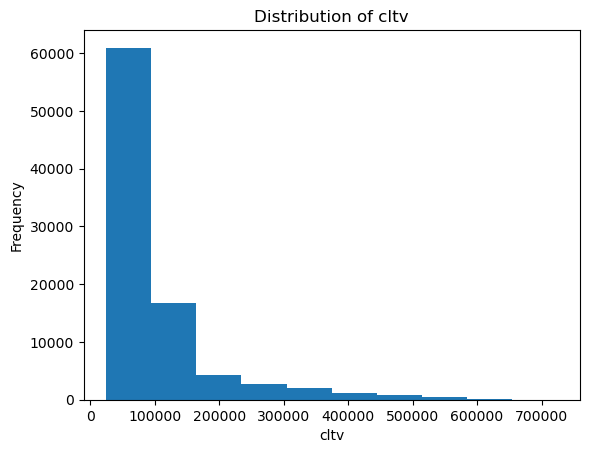

Mean:  97966.41375914778
Median:  66408.0
Standard Deviation:  90622.72757011706


In [28]:
# Understand the distribution of the target variable 'cltv'
plt.hist(y)
plt.xlabel('cltv')
plt.ylabel('Frequency')
plt.title('Distribution of cltv')
plt.show()
print("Mean: ", y.mean())
print("Median: ", y.median())
print("Standard Deviation: ", y.std())

Distribution of y is leftword skewed, as we are training 'r2' as accuracy it will negatively affect our model

In [29]:
# converting marital status into category for analysis

X.marital_status=X.marital_status.astype('object')
test.marital_status=test.marital_status.astype('object')

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89366 entries, 1 to 89392
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          89366 non-null  object
 1   area            89366 non-null  object
 2   qualification   89366 non-null  object
 3   income          89366 non-null  object
 4   marital_status  89366 non-null  object
 5   vintage         89366 non-null  int64 
 6   claim_amount    89366 non-null  int64 
 7   num_policies    89366 non-null  object
 8   policy          89366 non-null  object
 9   type_of_policy  89366 non-null  object
dtypes: int64(2), object(8)
memory usage: 7.5+ MB


In [35]:
for column in df.select_dtypes('object').columns:
    print(df[column].value_counts(),'\n')

Male      50484
Female    38882
Name: gender, dtype: int64 

Urban    62450
Rural    26916
Name: area, dtype: int64 

High School    46233
Bachelor       39387
Others          3746
Name: qualification, dtype: int64 

5L-10L           52693
2L-5L            21158
More than 10L    13661
<=2L              1854
Name: income, dtype: int64 

More than 1    60254
1              29112
Name: num_policies, dtype: int64 

A    56627
B    24626
C     8113
Name: policy, dtype: int64 

Platinum    47777
Silver      21005
Gold        20584
Name: type_of_policy, dtype: int64 



The data demonstrates a higher proportion of individuals residing in urban areas, with an income between 5L-10L, holding multiple policies, and predominantly purchasing A policies of the Platinum type.

Does not contain any missing values

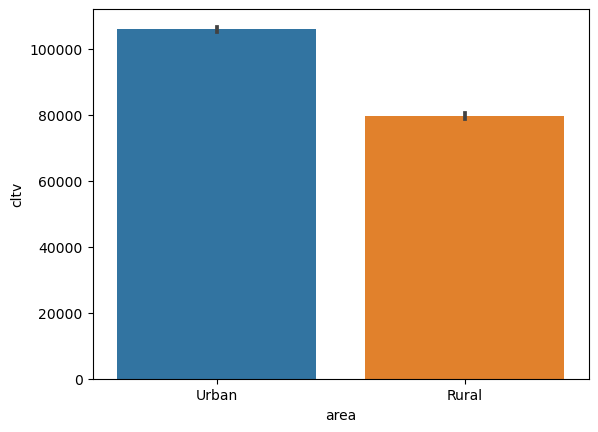

In [31]:
# Analyze the relationship between 'cltv' and other independent variables

sns.barplot(x='area', y='cltv', data=df)
plt.show()

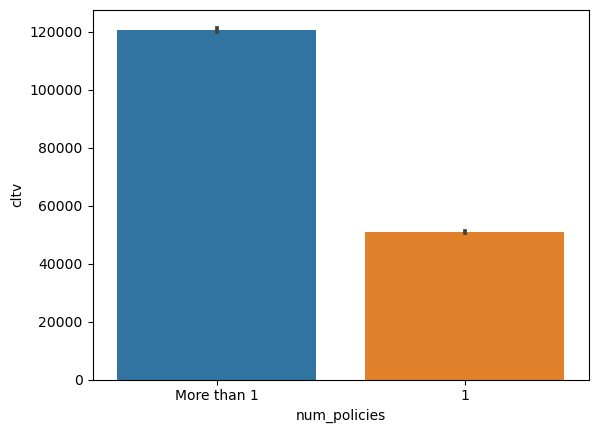

In [32]:
sns.barplot(x='num_policies', y='cltv', data=df)
plt.show()

Number of policies and area in which customer lives have huge impact on customer life time value

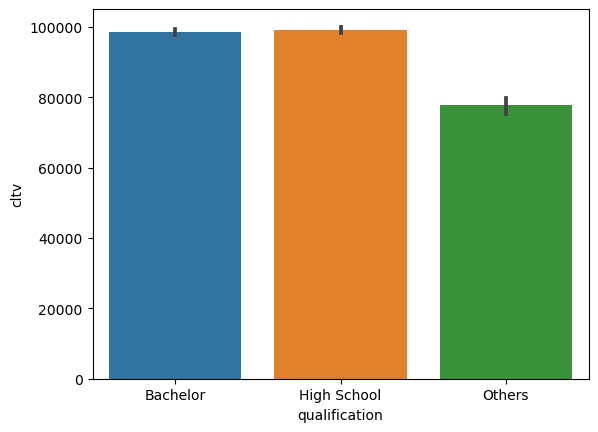

In [33]:
sns.barplot(x='qualification', y='cltv', data=df)
plt.show()

Others are very small in number,so not much useful

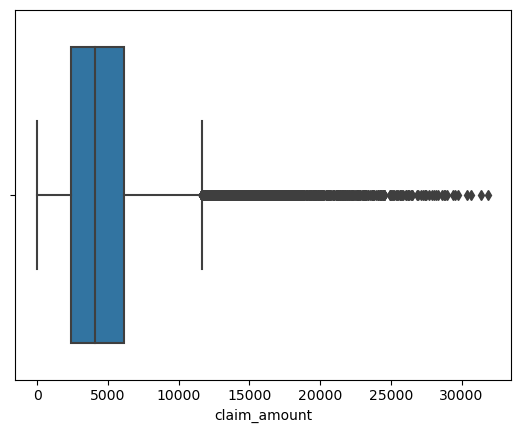

In [16]:
# Look for patterns in the data
sns.boxplot(x='claim_amount', data=df)
plt.show()


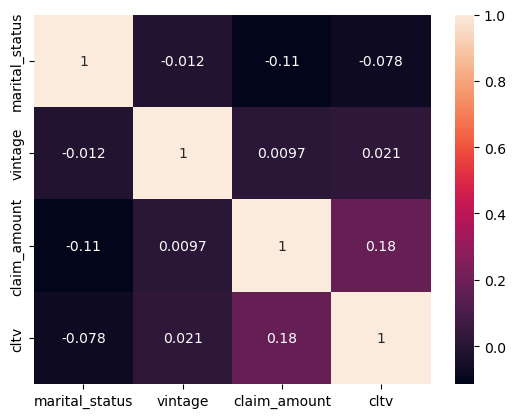

In [17]:
# Study the correlation between independent variables and 'cltv'
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


There is some correlation between claim amount and cltv

In [18]:
import itertools
import pandas as pd

# Select only categorical variables from the dataframe
categorical_vars = X.select_dtypes(include=['object', 'category'])

# Get all combinations of pairs of variables
combinations = list(itertools.combinations(categorical_vars.columns, 2))

# Iterate over all pairs of variables and create a cross-table
for var1, var2 in combinations:
    cross_table = pd.crosstab(categorical_vars[var1], categorical_vars[var2])
    print(cross_table,'\n')

area    Rural  Urban
gender              
Female  12573  26309
Male    14343  36141 

qualification  Bachelor  High School  Others
gender                                      
Female            16343        20870    1669
Male              23044        25363    2077 

income  2L-5L  5L-10L  <=2L  More than 10L
gender                                    
Female   9493   22210  1038           6141
Male    11665   30483   816           7520 

marital_status      0      1
gender                      
Female          18053  20829
Male            19889  30595 

num_policies      1  More than 1
gender                          
Female        11570        27312
Male          17542        32942 

policy      A      B     C
gender                    
Female  24801  10649  3432
Male    31826  13977  4681 

type_of_policy   Gold  Platinum  Silver
gender                                 
Female           8969     20436    9477
Male            11615     27341   11528 

qualification  Bachelor  High Scho